In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
import pandas as pd
from scipy.fftpack import fft,ifft

In [2]:
lc = pd.read_csv('lc.csv')
time = lc['time']
rate = lc['rate']
back = lc['back_rate']
print('total s/n:', np.sum(rate)/np.sum(back))

total s/n: 13.172611571392906


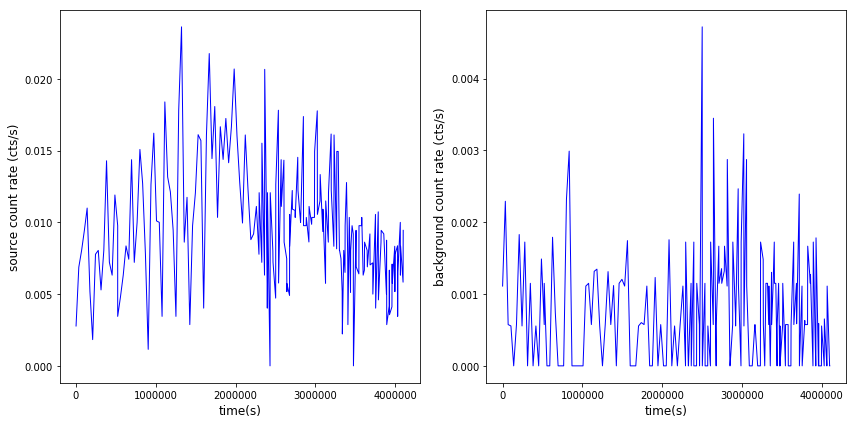

In [3]:
# 源和背景各自的光变

fig = plt.figure(figsize=[12,6])

ax1 = fig.add_subplot(121)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.set_xlabel('time(s)',fontsize=12)
ax1.set_ylabel('source count rate (cts/s)',fontsize=12)
#ax1.scatter(time_list,rate_list,c='blue',marker='o',s=1.5) 
ax1.plot(time,rate,'b-',linewidth=1,markersize=4)

ax2 = fig.add_subplot(122)
#ax2.set_yscale("log")
ax2.set_xlabel('time(s)',fontsize=12)
ax2.set_ylabel('background count rate (cts/s)',fontsize=12)
#ax2.scatter(time_list,rate_list,c='blue',marker='o',s=1.5) 
ax2.plot(time,back,'b-',linewidth=1,markersize=4)

fig.tight_layout()
plt.show()

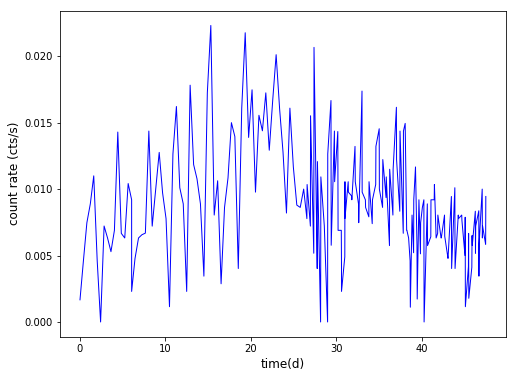

In [4]:
# 净光变曲线

time = np.array(time)
rate = np.array(rate)
back = np.array(back)
time_d = time/(24*60*60)
rate_clean = rate - back

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel('time(d)',fontsize=12)
ax.set_ylabel('count rate (cts/s)',fontsize=12)
#ax1.scatter(time_list,rate_clean,c='blue',marker='o',s=1.5) 
ax.plot(time_d,rate_clean,'b-',linewidth=1,markersize=4)
plt.show()

In [5]:
print(time.min(),time.max())
print(len(time))
print(len(rate_clean))
print(time.max()-time.min())

899.7999999970198 4100339.9499995713
190
190
4099440.1499995743


F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
F:\Anaconda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


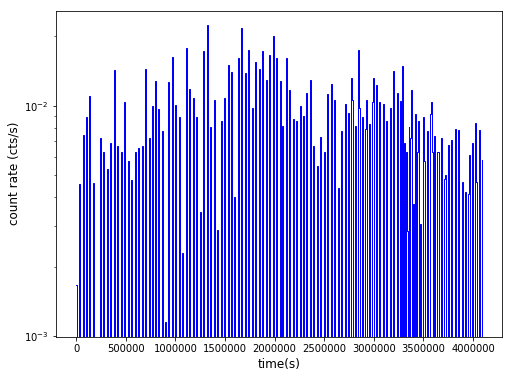

In [6]:
dt = 10000
time_list = np.arange(0, 4100000+dt, dt)
rate_list = []
for i in range(1,len(time_list)):
    ints = (time<time_list[i])&(time>=time_list[i-1])
    rate_new = np.mean(rate_clean[ints])
    rate_list.append(rate_new)

rate_list = np.array(rate_list)
rate_list[np.isnan(rate_list)] = 0
time_list = np.arange(0, 4100000, dt)

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel('time(s)',fontsize=12)
ax.set_ylabel('count rate (cts/s)',fontsize=12)
#ax1.scatter(time_list,rate_clean,c='blue',marker='o',s=1.5) 
ax.step(time_list,rate_list,'b-',linewidth=1,where='post')
plt.show()

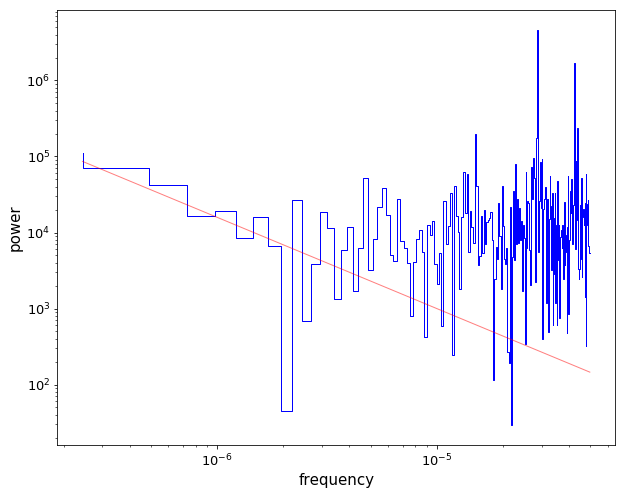

In [7]:
#psd

N = len(rate_list)

nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(rate_list)
dft = fft(rate_list-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1 = np.array(F1)
line = F1**(-1.2)*(1e-3)

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(F1, per_data, color="b", linewidth=1)
plt.plot(F1, line, color="r", alpha=0.5, linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()